# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
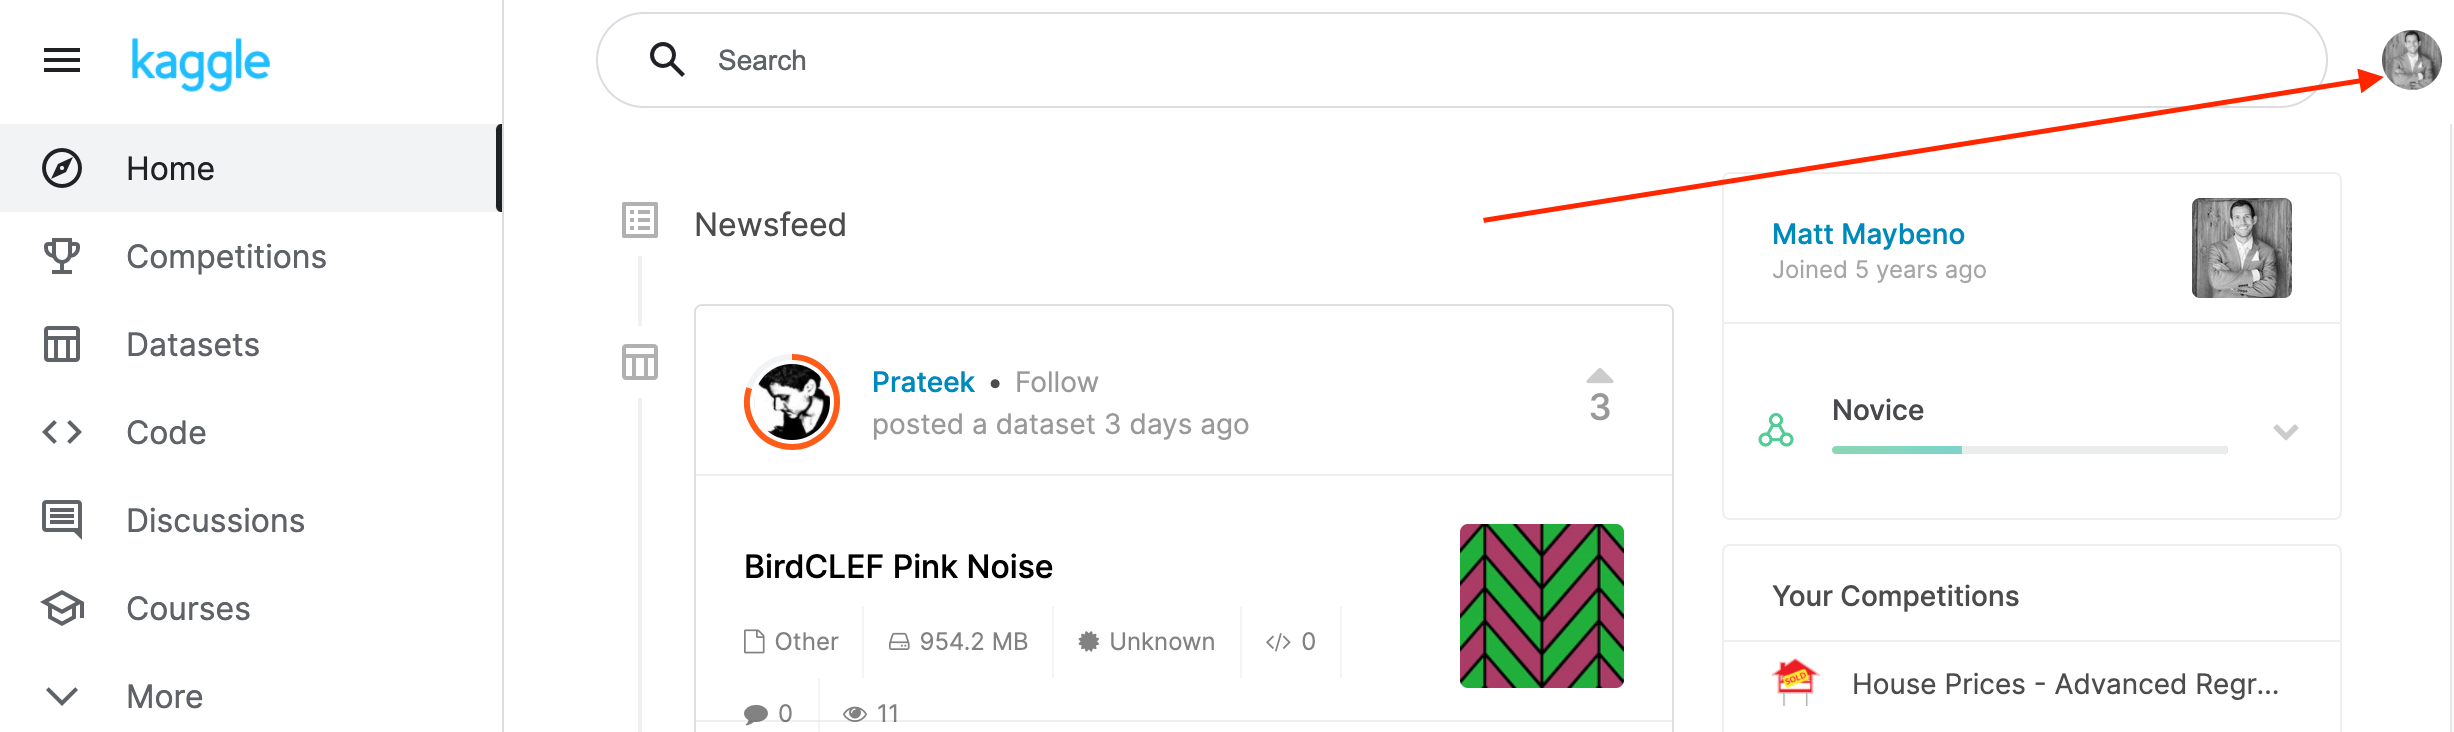
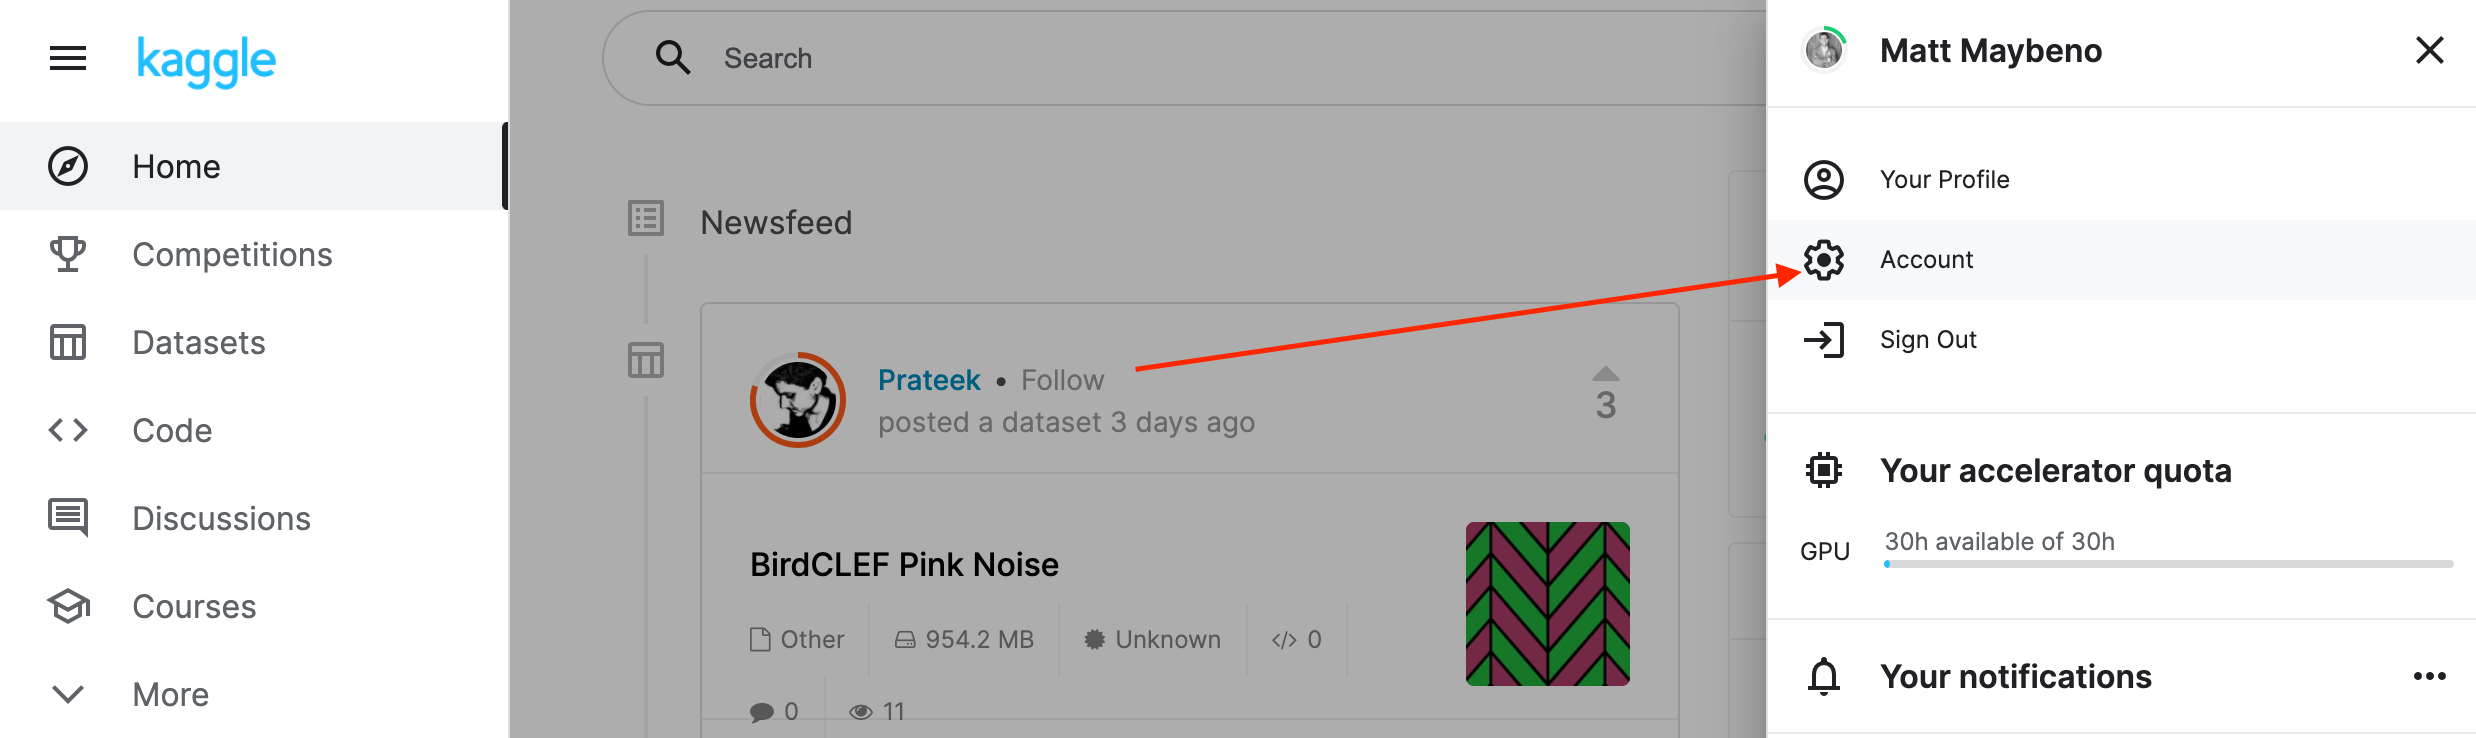
2. Scroll down to API and click Create New API Token.
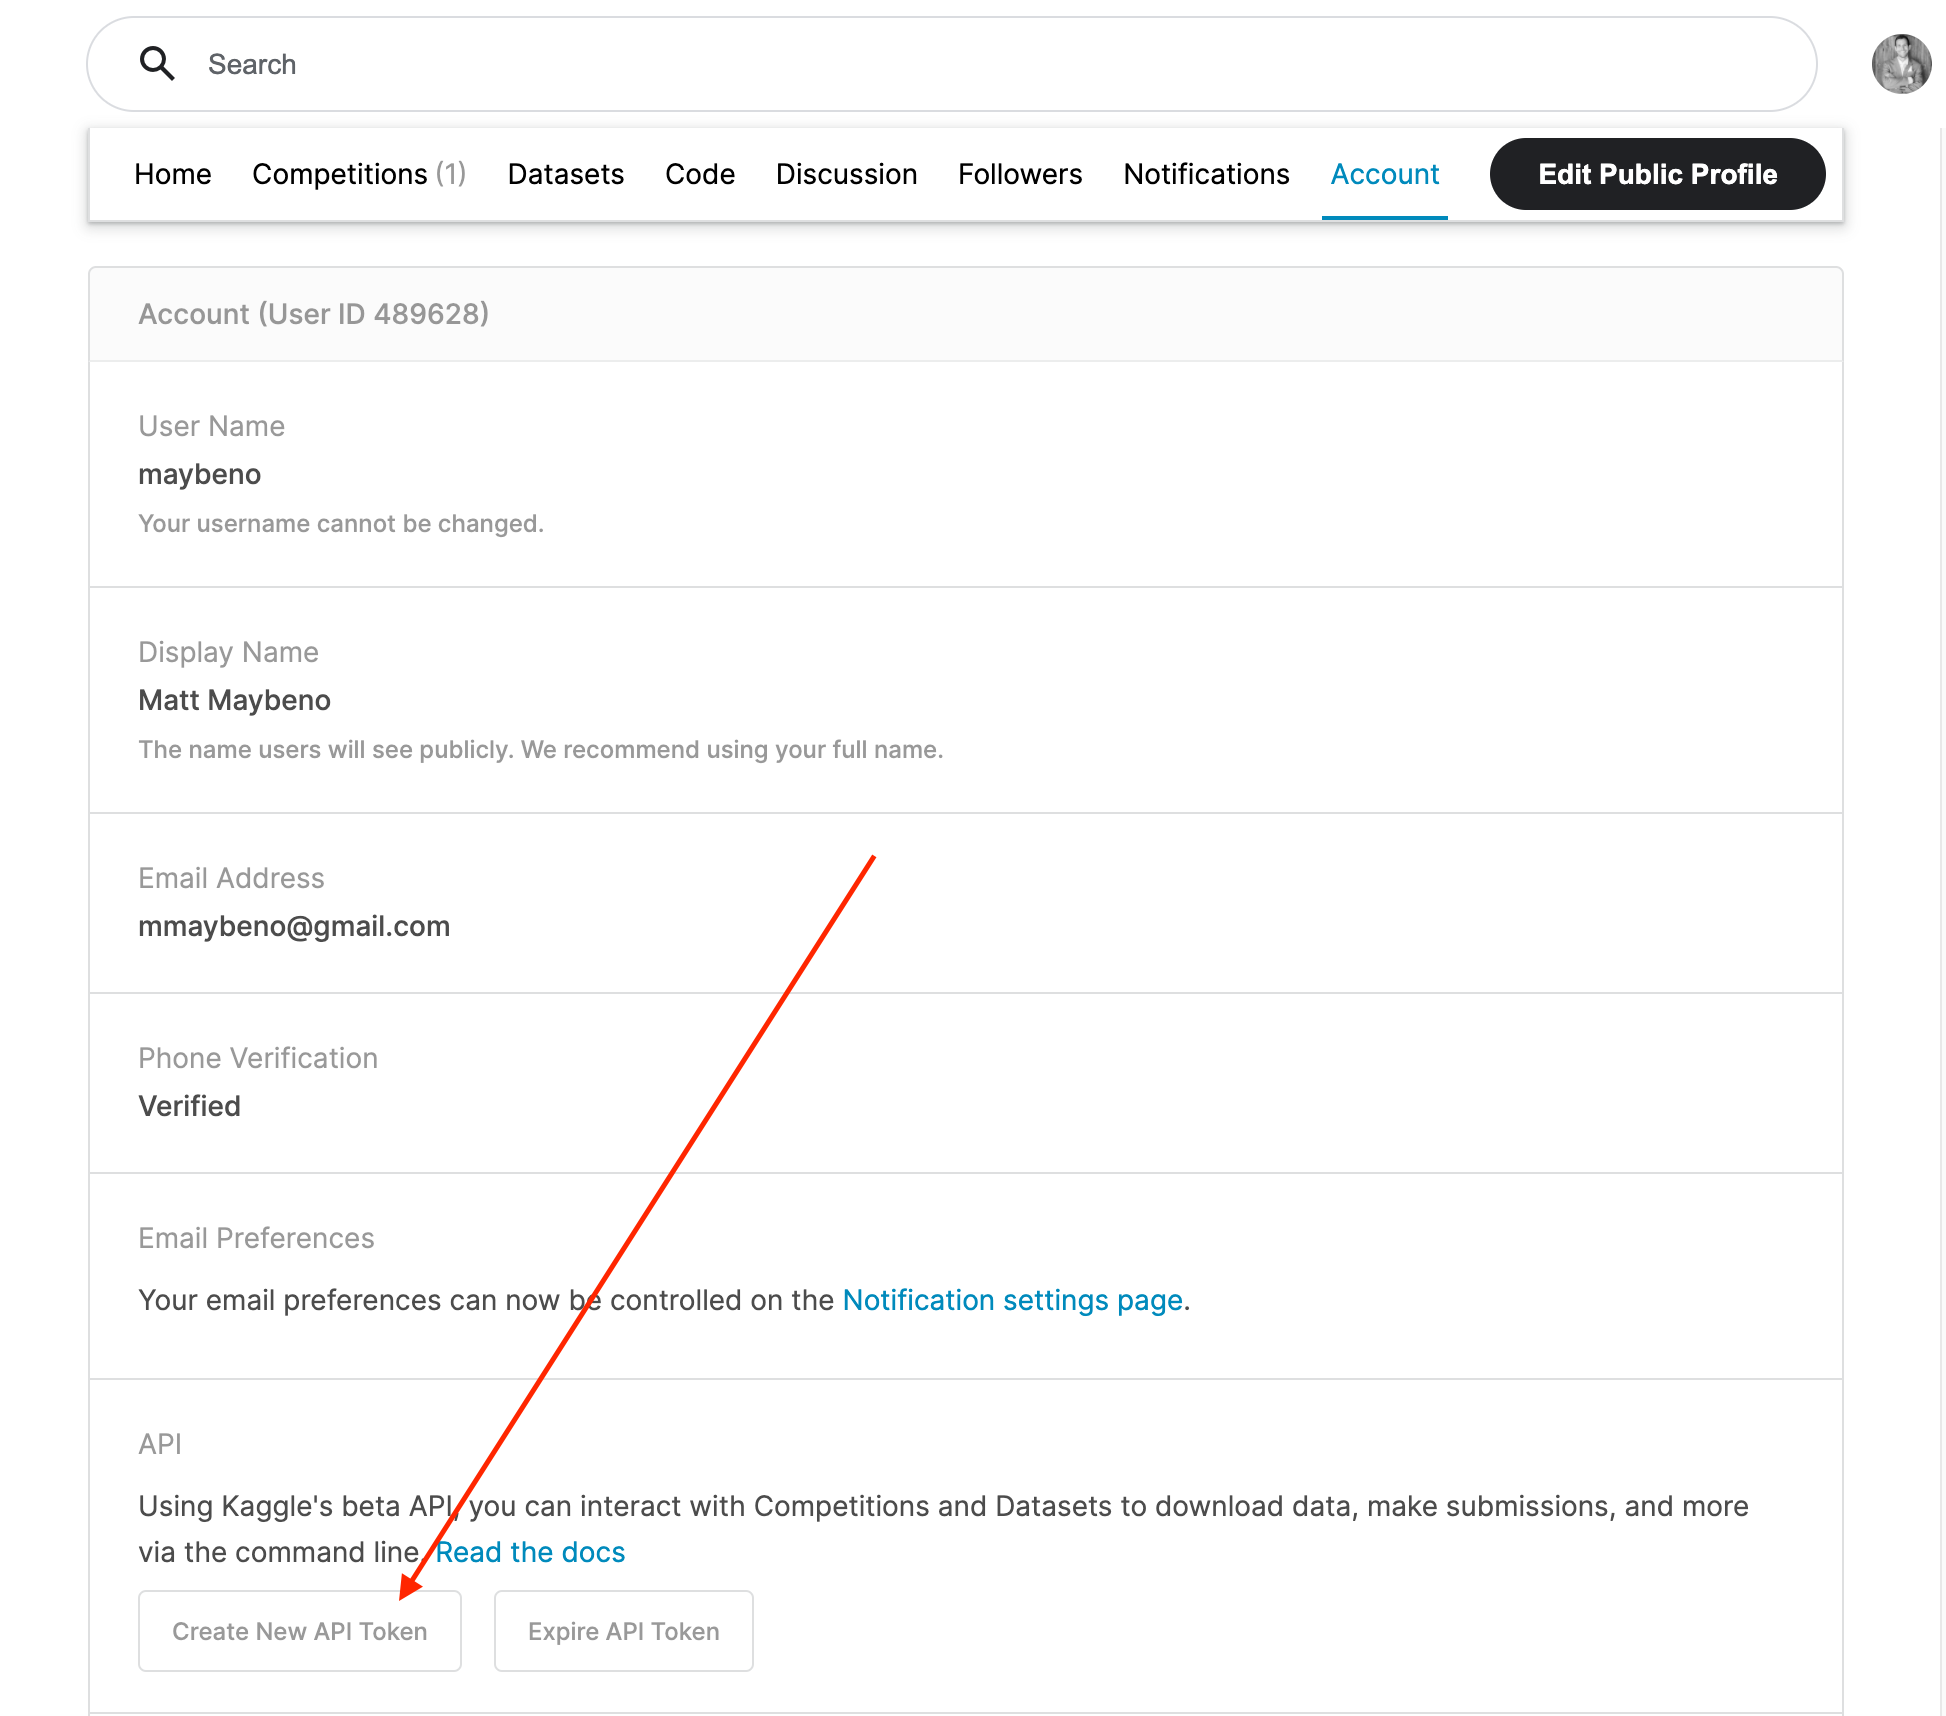
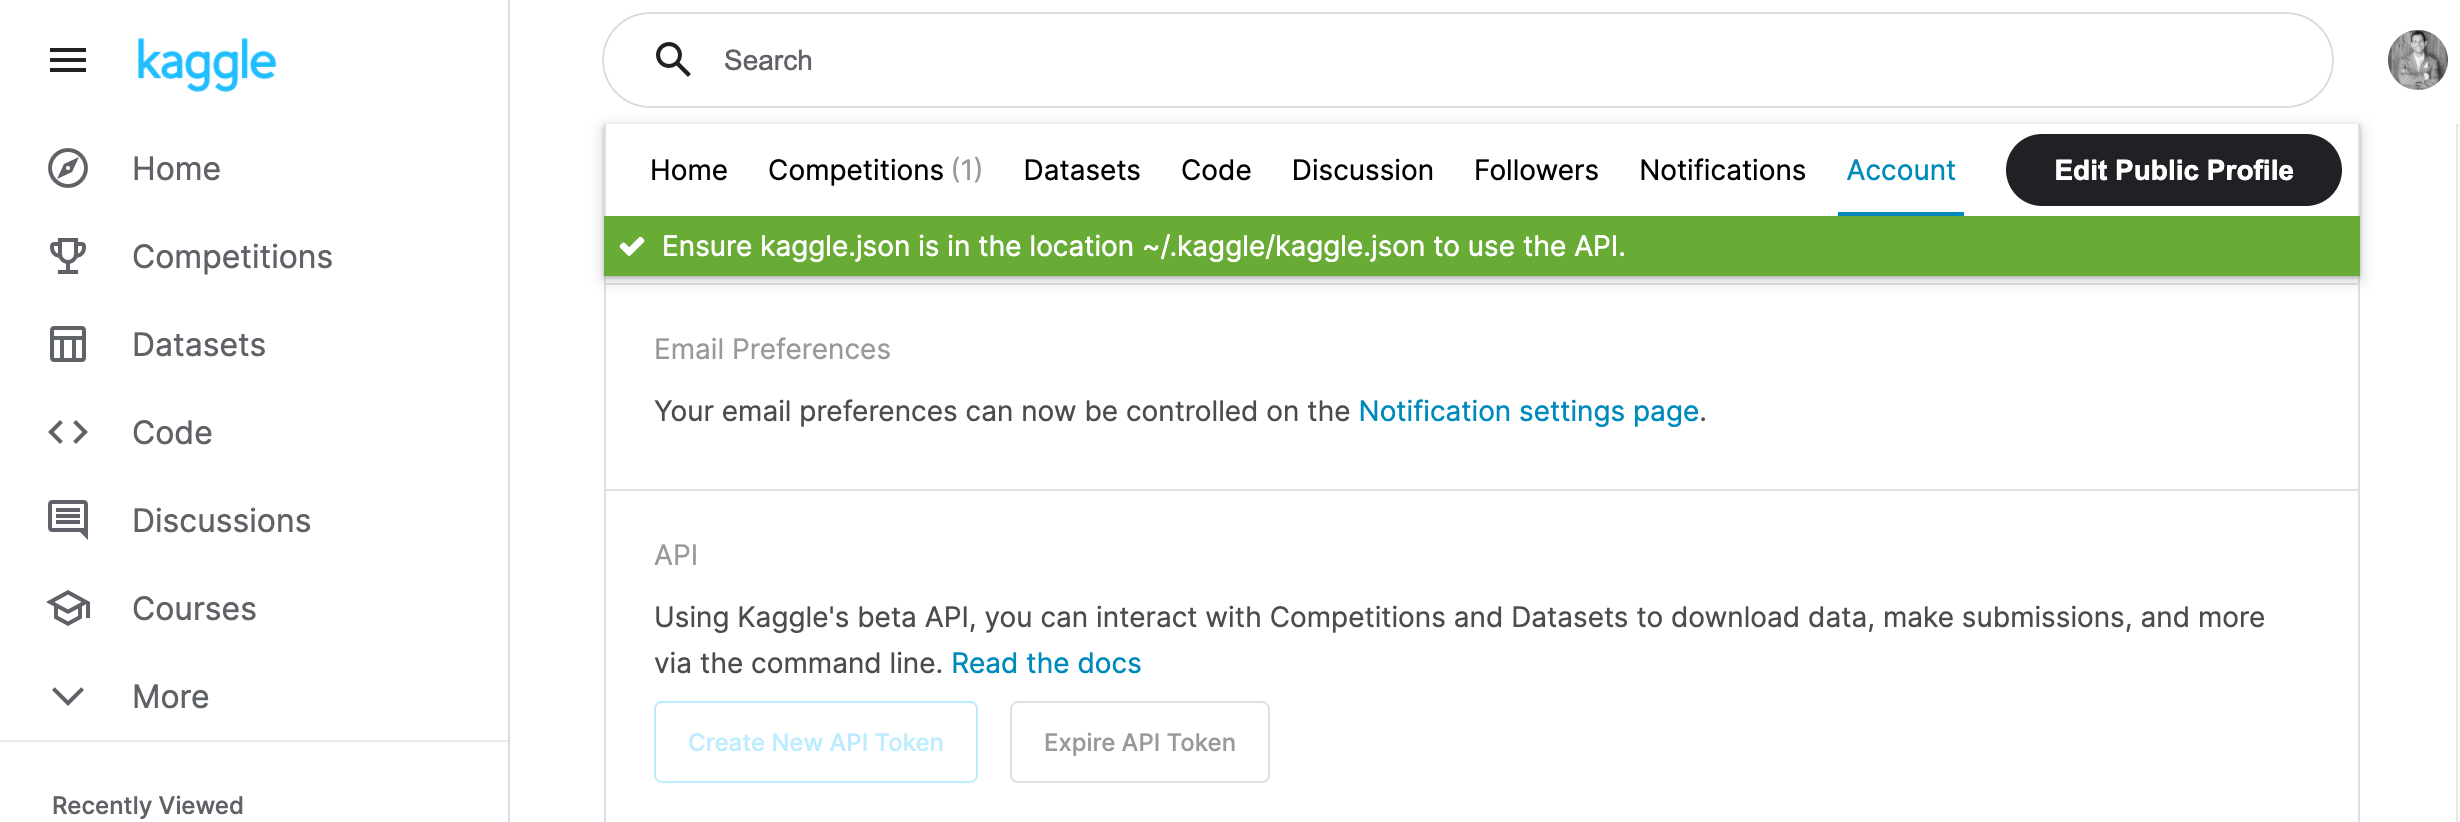
3. Open up `kaggle.json` and use the username and key.
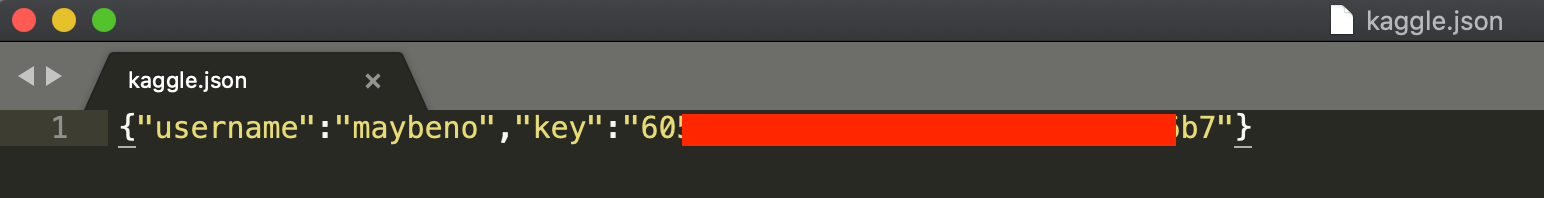

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 2.1 MB 32.3 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.1 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 25.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 37.5 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=f84db0a5be3f36e8e2f8bb158c4ea2f0fb2c5f492d86734b96aa1cb8330925ef
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "hidden"
kaggle_key = "hidden"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [7]:
# Download kaggle package
!pip install kaggle --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=ece2c1a6e1316f8fe42d34621863caacd80e4894c66f8d2b77b362c6a1414b64
  Stored in directory: /root/.cache/pip/wheels/fd/97/a6/3372cb23468915cbcf108338dd29c73379fd1a55828ec608ba
Successfully built kaggle


### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
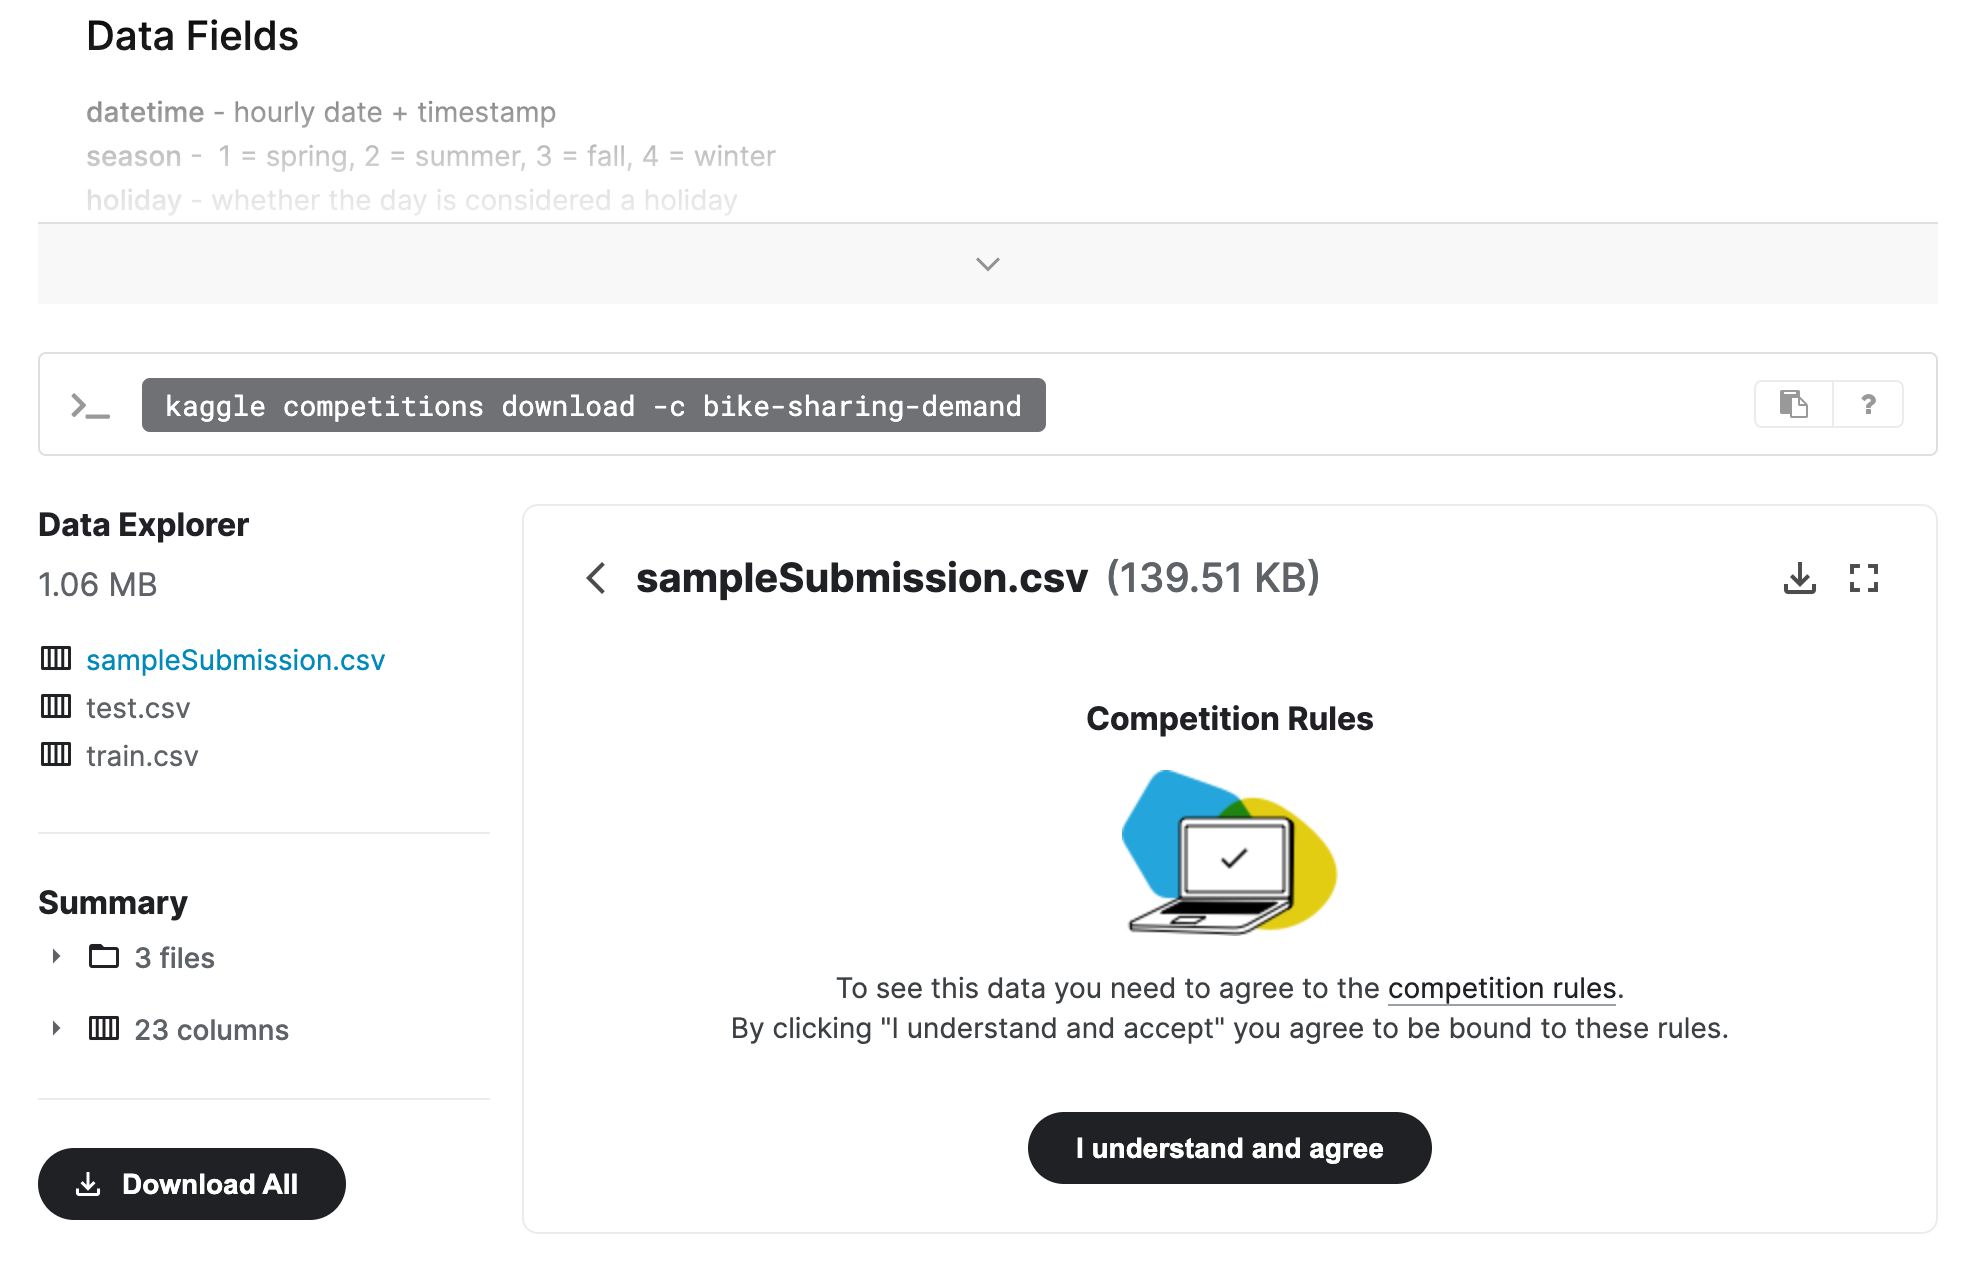

In [8]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 7.25MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [9]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train['datetime'] = pd.to_datetime(train['datetime'])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [11]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [12]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test['datetime'] = pd.to_datetime(test['datetime'])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [14]:
test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [15]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission['datetime'] = pd.to_datetime(submission['datetime'])
submission.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

In [16]:
submission.dtypes

datetime    datetime64[ns]
count                int64
dtype: object

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [17]:
# Remove unwanted columns
ignored_columns = ['casual', 'registered']
train = train.drop(columns=ignored_columns)

In [18]:
predictor = TabularPredictor(label="count", eval_metric = "root_mean_squared_error").fit(train_data=train,
    time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230530_150523/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_150523/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [19]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.089417      18.613550  552.301860                0.001315           0.318831            3       True         14
1   RandomForestMSE_BAG_L2  -53.408112      14.362632  411.924647                0.605104          27.210243            2       True         12
2          LightGBM_BAG_L2  -55.038470      13.961761  408.550730                0.204233          23.836326            2       True         11
3          CatBoost_BAG_L2  -55.759164      13.805289  443.500993                0.047761          58.786588            2       True         13
4        LightGBMXT_BAG_L2  -60.230987      17.755137  442.149873                3.997609          57.435468            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.114578    0.036227         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

### Create predictions from test dataset

In [20]:
predictions = predictor.predict(test)
predictions.head()

0    23.635983
1    43.208549
2    46.383026
3    50.017845
4    52.458336
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [21]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.774971
std        90.005173
min         3.032427
25%        19.975693
50%        64.432770
75%       167.462830
max       363.934753
Name: count, dtype: float64

In [22]:
# How many negative values do we have?
predictions[predictions < 0].count()

0

In [23]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [24]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [25]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "Final raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 462kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [26]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-05-30 15:18:27  Final raw submission               complete  1.79860      1.79860       
submission_new_hpo4.csv      2023-05-27 05:42:11  new features, hpo4 tuning          complete  0.45402      0.45402       
submission_new_hpo3.csv      2023-05-27 05:15:19  new features, hpo3 tuning          complete  0.45530      0.45530       
submission_new_hpo2.csv      2023-05-27 05:06:29  new features, hpo2 tuning          complete  0.46052      0.46052       


#### Initial score of ` 1.79860`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

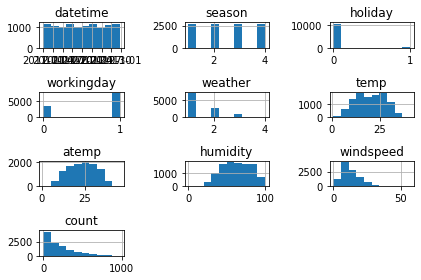

In [27]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist()
plt.tight_layout()

In [28]:
# Split into new features for train
train_new_feature = train.copy()
train_new_feature['year'] = train_new_feature['datetime'].dt.year
train_new_feature['month'] = train_new_feature['datetime'].dt.month
train_new_feature['day'] = train_new_feature['datetime'].dt.day
train_new_feature['hour'] = train_new_feature['datetime'].dt.hour
train_new_feature['minute'] = train_new_feature['datetime'].dt.minute
train_new_feature['second'] = train_new_feature['datetime'].dt.second
train_new_feature['weekday'] = train_new_feature['datetime'].dt.day_name()
train_new_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int64         
 11  month       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  hour        10886 non-null  int64         
 14  minute      10886 non-null  int64         
 15  second      10886 non-null  int64         
 16  weekday     10886 non-

In [29]:
# Split into new features for test
test_new_feature = test.copy()
test_new_feature['year'] = test_new_feature['datetime'].dt.year
test_new_feature['month'] = test_new_feature['datetime'].dt.month
test_new_feature['day'] = test_new_feature['datetime'].dt.day
test_new_feature['hour'] = test_new_feature['datetime'].dt.hour
test_new_feature['minute'] = test_new_feature['datetime'].dt.minute
test_new_feature['second'] = test_new_feature['datetime'].dt.second
test_new_feature['weekday'] = test_new_feature['datetime'].dt.day_name()
test_new_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int64         
 10  month       6493 non-null   int64         
 11  day         6493 non-null   int64         
 12  hour        6493 non-null   int64         
 13  minute      6493 non-null   int64         
 14  second      6493 non-null   int64         
 15  weekday     6493 non-null   object        
dtypes: datetime64[ns](1), fl

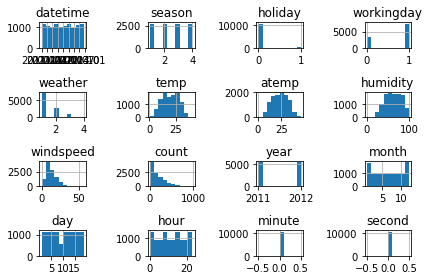

In [30]:
# Replot to observe if any needs to be changed to categories
train_new_feature.hist()
plt.tight_layout()

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [31]:
# Based on histogram you can decide with to change to categorical

# Train
train_new_feature["season"] = train_new_feature["season"].astype('category')
train_new_feature["holiday"] = train_new_feature["holiday"].astype('category')
train_new_feature["workingday"] = train_new_feature["workingday"].astype('category')
train_new_feature["weather"] = train_new_feature["weather"].astype('category')
train_new_feature["year"] = train_new_feature["year"].astype('category')
train_new_feature["month"] = train_new_feature["month"].astype('category')
train_new_feature["day"] = train_new_feature["day"].astype('category')


# Test
test_new_feature["season"] = test_new_feature["season"].astype('category')
test_new_feature["holiday"] = test_new_feature["holiday"].astype('category')
test_new_feature["workingday"] = test_new_feature["workingday"].astype('category')
test_new_feature["weather"] = test_new_feature["weather"].astype('category')
test_new_feature["year"] = test_new_feature["year"].astype('category')
test_new_feature["month"] = test_new_feature["month"].astype('category')
test_new_feature["day"] = test_new_feature["day"].astype('category')

In [32]:
# Remove unwanted columns

train_new_feature = train_new_feature.drop('datetime', axis = 1)
test_new_feature = test_new_feature.drop('datetime', axis = 1)

In [33]:
train_new_feature.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
count            int64
year          category
month         category
day           category
hour             int64
minute           int64
second           int64
weekday         object
dtype: object

In [34]:
# View are new feature
train_new_feature.head()

season holiday workingday weather  temp   atemp  humidity  windspeed  count  \
0      1       0          0       1  9.84  14.395        81        0.0     16   
1      1       0          0       1  9.02  13.635        80        0.0     40   
2      1       0          0       1  9.02  13.635        80        0.0     32   
3      1       0          0       1  9.84  14.395        75        0.0     13   
4      1       0          0       1  9.84  14.395        75        0.0      1   

   year month day  hour  minute  second   weekday  
0  2011     1   1     0       0       0  Saturday  
1  2011     1   1     1       0       0  Saturday  
2  2011     1   1     2       0       0  Saturday  
3  2011     1   1     3       0       0  Saturday  
4  2011     1   1     4       0       0  Saturday

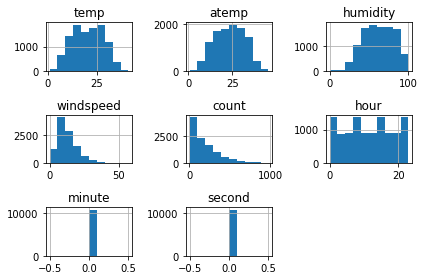

In [35]:
# View histogram of all features again now with the hour feature and other new features after changing to categorical
train_new_feature.hist()
plt.tight_layout()

## Step 5: Rerun the model with the same settings as before, just with more features

In [36]:
predictor_new_features = TabularPredictor(label="count", eval_metric = "root_mean_squared_error").fit(train_data=train_new_feature,
    time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230530_152428/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_152428/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [37]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.001251      18.674409  538.013430                0.000926           0.706785            3       True         15
1     ExtraTreesMSE_BAG_L2  -32.288236      17.685714  406.417915                0.604891           8.253986            2       True         14
2          CatBoost_BAG_L2  -32.293092      17.316064  479.782180                0.235240          81.618252            2       True         13
3      WeightedEnsemble_L2  -32.384572      16.193995  355.359724                0.001259           0.774030            2       True          9
4          LightGBM_BAG_L2  -32.525509      17.227494  420.328933                0.146670          22.165004            2       True         11
5   RandomForestMSE_BAG_L2  -32.736556      17.686681  425.269402         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -124.76825428589918,
  'KNeighborsDist_BAG_L1': -125.61769498064501,
  'LightGBMXT_BAG_L1': -34.22604208813556,
  'LightGBM_BAG_L1': -

In [38]:
# Get predictions
predictions_new_features = predictor_new_features.predict(test_new_feature)
predictions_new_features.head()

0    8.818649
1    4.619554
2    4.224903
3    3.937473
4    3.872818
Name: count, dtype: float32

In [39]:
predictions_new_features.describe()

count    6493.000000
mean      190.548920
std       175.168091
min         2.842123
25%        45.489380
50%       150.160034
75%       283.591125
max       896.135498
Name: count, dtype: float64

In [40]:
# Remember to set all negative values to zero
#Check for negative
predictions_new_features[predictions_new_features < 0].count()

# Change to non-negative (0)
predictions_new_features[predictions_new_features < 0] = 0

In [41]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [42]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 326kB/s]
Successfully submitted to Bike Sharing Demand

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-30 15:37:31  new features                       complete  0.43877      0.43877       
submission.csv               2023-05-30 15:18:27  Final raw submission               complete  1.79860      1.79860       
submission_new_hpo4.csv      2023-05-27 05:42:11  new features, hpo4 tuning          complete  0.45402      0.45402       
submission_new_hpo3.csv      2023-05-27 05:15:19  new features, hpo3 tuning          complete  0.45530      0.45530       


#### New Score of `0.43877`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [46]:
# Getting hyper parameters ready, search strategy set to auto
import autogluon.core as ag


nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 600  # train various models for ~10 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler


hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label="count", eval_metric = "root_mean_squared_error").fit(
    train_data=train_new_feature,
    time_limit=time_limit,
    presets="best_quality",
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230530_153820/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_153820/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [47]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -36.915529       1.402247  335.217029                0.000982           0.369453            3       True         12
1    LightGBM_BAG_L2/T3  -36.958322       1.102473  252.528166                0.199214          43.324197            2       True          9
2    LightGBM_BAG_L2/T1  -37.092986       1.059273  250.274664                0.156015          41.070695            2       True          7
3    LightGBM_BAG_L2/T2  -37.289776       1.046035  250.452684                0.142777          41.248715            2       True          8
4    LightGBM_BAG_L2/T5  -37.600461       1.057776  251.523378                0.154518          42.319409            2       True         11
5   WeightedEnsemble_L2  -38.886700       0.374815   83.812653                0.001170      

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -41.32861385583933,
  'LightGBM_BAG_L1/T2': -39.309289283685246,
  'LightGBM_BAG_L1/T3': -39.72568186395291,
  'LightGBM_BAG_L1/T4': -123.6996241867578,
  'LightGBM_BAG_L1/T5': -45.02781197458881,
  'WeightedEnsemble_L2': -38.886700373263665,
  'LightGBM_BAG_L2/T1': -37.09298552867035,
  'LightGBM_BAG_L2/T2': -37.2897

In [48]:
# Get predictions
predictions_new_hpo = predictor_new_hpo.predict(test_new_feature)
predictions_new_hpo.head()

0    12.048895
1     7.248312
2     7.248312
3     7.255349
4     7.245025
Name: count, dtype: float32

In [49]:
predictions_new_hpo.describe()

count    6493.000000
mean      190.608002
std       176.525040
min         6.179218
25%        44.539452
50%       146.557953
75%       284.911194
max       868.272705
Name: count, dtype: float64

In [50]:
# Remember to set all negative values to zero
#Check for negative
predictions_new_hpo[predictions_new_hpo < 0].count()

# Change to non-negative (0)
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [51]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [52]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters, hpo"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 377kB/s]
Successfully submitted to Bike Sharing Demand

In [53]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-30 15:49:56  new features with hyperparameters, hpo  complete  0.46110      0.46110       
submission_new_features.csv  2023-05-30 15:37:31  new features                            complete  0.43877      0.43877       
submission.csv               2023-05-30 15:18:27  Final raw submission                    complete  1.79860      1.79860       
submission_new_hpo4.csv      2023-05-27 05:42:11  new features, hpo4 tuning               complete  0.45402      0.45402       


#### New Score of `0.46110`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

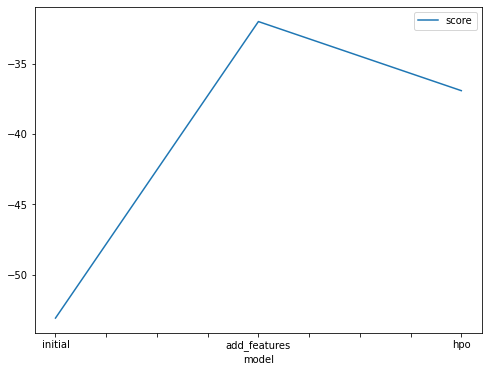

In [54]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.089417, -32.001251, -36.915529]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

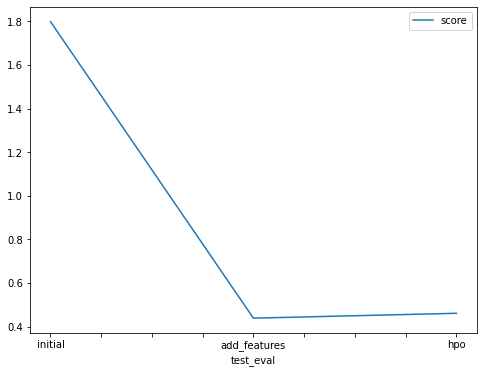

In [55]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79860, 0.43877, 0.46110]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

#### Try different hyper parameters (Part 2)

nn_options = {  
  
  specifies non-default hyperparameter values for neural network models

    'num_epochs': 20, 

    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), 

}

gbm_options = {  

    'num_boost_round': 120,  

    'num_leaves': ag.space.Int(lower=35, upper=70, default=40),  

}

In [56]:
# Try different search strategies (Bayesian)
# Getting hyper parameters ready, search strategy set to auto
import autogluon.core as ag


nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 20,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 120,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=35, upper=70, default=40),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 600  # train various models for ~10 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler


hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_hpo2 = TabularPredictor(label="count", eval_metric = "root_mean_squared_error").fit(
    train_data=train_new_feature,
    time_limit=time_limit,
    presets="best_quality",
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)



No path specified. Models will be saved in: "AutogluonModels/ag-20230530_155235/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_155235/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [57]:
predictor_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -35.541899       1.223035  285.537059                0.001351           0.598471            3       True         12
1    LightGBM_BAG_L2/T2 -35.718127       1.221400  237.266936                0.000098          23.701339            2       True          8
2   WeightedEnsemble_L2 -35.761780       0.458035   85.025231                0.001351           0.474240            2       True          6
3    LightGBM_BAG_L2/T3 -35.805994       1.221444  237.889924                0.000142          24.324327            2       True          9
4    LightGBM_BAG_L2/T1 -35.872193       1.221439  237.594907                0.000138          24.029310            2       True          7
5    LightGBM_BAG_L2/T4 -35.988225       1.221443  236.912921                0.000142          23.

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -39.191597174881565,
  'LightGBM_BAG_L1/T2': -37.12881148088462,
  'LightGBM_BAG_L1/T3': -38.350845859029384,
  'LightGBM_BAG_L1/T4': -36.048195616770826,
  'LightGBM_BAG_L1/T5': -41.127063887328184,
  'WeightedEnsemble_L2': -35.7617796417092,
  'LightGBM_BAG_L2/T1': -35.872193085483644,
  'LightGBM_BAG_L2/T2': -35.71

In [58]:
# Get predictions
predictions_hpo2 = predictor_hpo2.predict(test_new_feature)
predictions_hpo2.head()

0    8.672794
1    6.025062
2    5.987789
3    5.885159
4    5.885159
Name: count, dtype: float32

In [59]:
predictions_hpo2.describe()

count    6493.000000
mean      188.649002
std       175.644623
min         5.197008
25%        43.054760
50%       148.214447
75%       279.161285
max       878.479004
Name: count, dtype: float64

In [60]:
# Remember to set all negative values to zero
#Check for negative
predictions_hpo2[predictions_hpo2 < 0].count()

# Change to non-negative (0)
predictions_hpo2[predictions_hpo2 < 0] = 0

In [61]:
# Same submitting predictions
submission_hpo2 = submission.copy()
submission_hpo2["count"] = predictions_hpo2
submission_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [62]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features, hpo2 tuning"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 352kB/s]
Successfully submitted to Bike Sharing Demand

In [64]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo2.csv      2023-05-30 15:59:44  new features, hpo2 tuning               complete  0.45497      0.45497       
submission_new_hpo.csv       2023-05-30 15:49:56  new features with hyperparameters, hpo  complete  0.46110      0.46110       
submission_new_features.csv  2023-05-30 15:37:31  new features                            complete  0.43877      0.43877       
submission.csv               2023-05-30 15:18:27  Final raw submission                    complete  1.79860      1.79860       


#### Try different hyper parameters (Part 3)

nn_options = {  
  
  specifies non-default hyperparameter values for neural network models

    'num_epochs': 50, 

    'learning_rate': ag.space.Real(1e-4, 1e-1, default=5e-3, log=True), 

}

gbm_options = {  

    'num_boost_round': 150,  

    'num_leaves': ag.space.Int(lower=50, upper=100, default=55),  

}

In [65]:
# Try different search strategies (Bayesian)
# Getting hyper parameters ready, search strategy set to auto
import autogluon.core as ag


nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 50,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-1, default=5e-3, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 150,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=50, upper=100, default=55),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 600  # train various models for ~10 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler


hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_hpo3 = TabularPredictor(label="count", eval_metric = "root_mean_squared_error").fit(
    train_data=train_new_feature,
    time_limit=time_limit,
    presets="best_quality",
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)



No path specified. Models will be saved in: "AutogluonModels/ag-20230530_160014/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_160014/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [66]:
predictor_hpo3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -34.845839       1.428514  298.421574                0.001465           0.570366            3       True         12
1    LightGBM_BAG_L2/T3 -35.037415       1.426823  249.552711                0.000098          25.788087            2       True          9
2   WeightedEnsemble_L2 -35.097597       0.593042   91.557351                0.000805           0.350431            2       True          6
3    LightGBM_BAG_L2/T2 -35.192188       1.426854  247.568491                0.000129          23.803867            2       True          8
4    LightGBM_BAG_L2/T5 -35.196675       1.426858  248.418811                0.000134          24.654187            2       True         11
5    LightGBM_BAG_L2/T1 -35.220425       1.426821  248.259254                0.000097          24.

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -36.34783810039639,
  'LightGBM_BAG_L1/T2': -35.27031619741451,
  'LightGBM_BAG_L1/T3': -36.56871279154775,
  'LightGBM_BAG_L1/T4': -98.51943364270055,
  'LightGBM_BAG_L1/T5': -37.87143227962591,
  'WeightedEnsemble_L2': -35.09759668242935,
  'LightGBM_BAG_L2/T1': -35.22042546469224,
  'LightGBM_BAG_L2/T2': -35.192188

In [67]:
# Get predictions
predictions_hpo3 = predictor_hpo3.predict(test_new_feature)
predictions_hpo3.head()

0    10.200268
1     6.153523
2     5.942106
3     5.907832
4     5.907832
Name: count, dtype: float32

In [68]:
predictions_hpo3.describe()

count    6493.000000
mean      189.768326
std       176.454636
min         5.582022
25%        43.931683
50%       146.968430
75%       281.543396
max       874.323364
Name: count, dtype: float64

In [69]:
# Remember to set all negative values to zero
#Check for negative
predictions_hpo3[predictions_hpo3 < 0].count()

# Change to non-negative (0)
predictions_hpo3[predictions_hpo3 < 0] = 0

In [70]:
# Same submitting predictions
submission_hpo3 = submission.copy()
submission_hpo3["count"] = predictions_hpo3
submission_hpo3.to_csv("submission_new_hpo3.csv", index=False)

In [71]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo3.csv -m "new features, hpo3 tuning"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 386kB/s]
Successfully submitted to Bike Sharing Demand

In [74]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo3.csv      2023-05-30 16:10:53  new features, hpo3 tuning               complete  0.44993      0.44993       
submission_new_hpo2.csv      2023-05-30 15:59:44  new features, hpo2 tuning               complete  0.45497      0.45497       
submission_new_hpo.csv       2023-05-30 15:49:56  new features with hyperparameters, hpo  complete  0.46110      0.46110       
submission_new_features.csv  2023-05-30 15:37:31  new features                            complete  0.43877      0.43877       


#### Increase run time of best tuning to 20 mins (hpo 4)

In [75]:
# Try different search strategies (Bayesian)
# Getting hyper parameters ready, search strategy set to auto
import autogluon.core as ag


nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 50,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-1, default=5e-3, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 150,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=50, upper=100, default=55),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 1200  # train various models for ~20 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler


hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_hpo4 = TabularPredictor(label="count", eval_metric = "root_mean_squared_error").fit(
    train_data=train_new_feature,
    time_limit=time_limit,
    presets="best_quality",
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)



No path specified. Models will be saved in: "AutogluonModels/ag-20230530_161126/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20230530_161126/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [76]:
predictor_hpo4.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -34.253545       6.662571  731.890720                0.000819           0.356841            3       True         12
1    LightGBM_BAG_L2/T3 -34.363587       5.992929  602.929217                0.439306          67.941778            2       True          9
2    LightGBM_BAG_L2/T1 -34.430725       5.926613  600.083510                0.372989          65.096070            2       True          7
3    LightGBM_BAG_L2/T5 -34.436537       5.969497  600.715127                0.415874          65.727687            2       True         11
4    LightGBM_BAG_L2/T2 -34.486271       5.849457  598.496032                0.295833          63.508592            2       True          8
5   WeightedEnsemble_L2 -34.740053       2.422305  217.953365                0.000895           0.

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -36.103926497893596,
  'LightGBM_BAG_L1/T2': -34.843093913858674,
  'LightGBM_BAG_L1/T3': -36.12272886233191,
  'LightGBM_BAG_L1/T4': -98.40453757856977,
  'LightGBM_BAG_L1/T5': -37.48437049926666,
  'WeightedEnsemble_L2': -34.74005297596406,
  'LightGBM_BAG_L2/T1': -34.43072496813852,
  'LightGBM_BAG_L2/T2': -34.4862

In [85]:
# Get predictions
predictions_hpo4 = predictor_hpo4.predict(test_new_feature)
predictions_hpo4.head()

0    11.173429
1     6.813325
2     6.685205
3     6.684133
4     6.683448
Name: count, dtype: float32

In [86]:
predictions_hpo4.describe()

count    6493.000000
mean      189.764435
std       175.877060
min         6.499901
25%        43.429173
50%       146.864822
75%       282.433350
max       869.882202
Name: count, dtype: float64

In [87]:
# Remember to set all negative values to zero
#Check for negative
predictions_hpo4[predictions_hpo4 < 0].count()

# Change to non-negative (0)
predictions_hpo4[predictions_hpo4 < 0] = 0

In [88]:
# Same submitting predictions
submission_hpo4 = submission.copy()
submission_hpo4["count"] = predictions_hpo4
submission_hpo4.to_csv("submission_new_hpo4.csv", index=False)

In [89]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo4.csv -m "new features, hpo4 tuning"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 374kB/s]
Successfully submitted to Bike Sharing Demand

In [94]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 9

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo4.csv      2023-05-30 16:31:56  new features, hpo4 tuning               complete  0.45788      0.45788       
submission_new_hpo4.csv      2023-05-30 16:29:21  new features, hpo4 tuning               complete  0.45788      0.45788       
submission_new_hpo3.csv      2023-05-30 16:10:53  new features, hpo3 tuning               complete  0.44993      0.44993       
submission_new_hpo2.csv      2023-05-30 15:59:44  new features, hpo2 tuning               complete  0.45497      0.45497       
submission_new_hpo.csv       2023-05-30 15:49:56  new features with hyperparameters, hpo  complete  0.46110      0.46110       
submission_new_features.csv  2023-05-30 15:37:31  new features                            complete  0.43

# Plot results

In [83]:
# The 3 hyperparameters we tuned with the kaggle score as the result
# pd.DataFrame({
#     "model": ["initial", "add_features", "hpo"],
#     "hpo1": [?, ?, ?],
#     "hpo2": [?, ?, ?],
#     "hpo3": [?, ?, ?],
#     "score": [?, ?, ?]
# })

# The 3 hyperparameters we tuned with the kaggle score as the result
results = pd.DataFrame({
    "model": ["initial", "add_features", "hpo", "hpo2", "hpo3", "hpo4"],
    "Gluon Results": [-53.089417, -32.001251, -36.915529, -35.541899, -34.845839, -34.253545],
    "Kaggle Scores": [1.79860, 0.43877, 0.46110, 0.45497,  0.44993 , 0.45788],
})

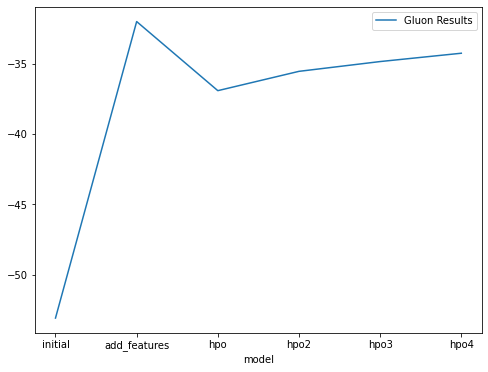

In [84]:
fig = results.plot(x="model", y="Gluon Results", figsize=(8, 6)).get_figure()
fig.savefig('final_model_train_score.png')

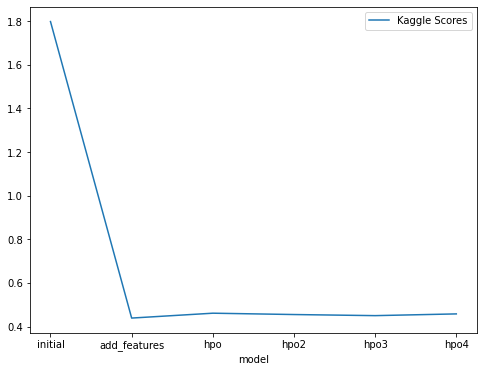

In [91]:
fig = results.plot(x="model", y="Kaggle Scores", figsize=(8, 6)).get_figure()
fig.savefig('final_model_test_score.png')

In [95]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "added features", "hpo"],
    "hpo1": ["Default values", "Default values", "nn_options: 'num_epochs': 10, 'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), gbm_options: 'num_boost_round': 100,  'num_leaves': ag.space.Int(lower=26, upper=66, default=36)"],
    "hpo2": ["Default values", "Default values", "nn_options: 'num_epochs': 20, 'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), gbm_options: 'num_boost_round': 120,  'num_leaves': ag.space.Int(lower=35, upper=70, default=40)"],
    "hpo3": ["Default values", "Default values", "nn_options: 'num_epochs': 50, 'learning_rate': ag.space.Real(1e-4, 1e-1, default=5e-3, log=True), gbm_options: 'num_boost_round': 150,  'num_leaves': ag.space.Int(lower=50, upper=100, default=55)"],
    "hpo4": ["Default values", "Default values", "nn_options: 'num_epochs': 50, 'learning_rate': ag.space.Real(1e-4, 1e-1, default=5e-4, log=True), gbm_options: 'num_boost_round': 150,  'num_leaves': ag.space.Int(lower=50, upper=100, default=55), time_limit = 1200"],
    "Best kaggle scores": [1.79860, 0.43877, 0.44993]
})

model  \
0         initial   
1  added features   
2             hpo   

                                                                                                                                                                                                 hpo1  \
0                                                                                                                                                                                      Default values   
1                                                                                                                                                                                      Default values   
2  nn_options: 'num_epochs': 10, 'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), gbm_options: 'num_boost_round': 100,  'num_leaves': ag.space.Int(lower=26, upper=66, default=36)   

                                                                                                                                                                                                 hpo2  \
0                                                                                                                                                                                      Default values   
1                                                                                                                                                                                      Default values   
2  nn_options: 'num_epochs': 20, 'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), gbm_options: 'num_boost_round': 120,  'num_leaves': ag.space.Int(lower=35, upper=70, default=40)   

                                                                                                                                                                                                  hpo3  \
0                                                                                                                                                                                       Default values   
1                                                                                                                                                                                       Default values   
2  nn_options: 'num_epochs': 50, 'learning_rate': ag.space.Real(1e-4, 1e-1, default=5e-3, log=True), gbm_options: 'num_boost_round': 150,  'num_leaves': ag.space.Int(lower=50, upper=100, default=55)   

                                                                                                                                                                                                                     hpo4  \
0                                                                                                                                                                                                          Default values   
1                                                                                                                                                                                                          Default values   
2  nn_options: 'num_epochs': 50, 'learning_rate': ag.space.Real(1e-4, 1e-1, default=5e-4, log=True), gbm_options: 'num_boost_round': 150,  'num_leaves': ag.space.Int(lower=50, upper=100, default=55), time_limit = 1200   

   Best kaggle scores  
0             1.79860  
1             0.43877  
2             0.44993